In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt








In [7]:
# Filepath to the log file
log_flow_16_path = 'log_flow_train_SDS_images_16.log'
log_vrnn_path = 'log_vrnn_train_SDS_images_best.log'
log_flow_32_path = 'log_flow_train_SDS_images_32.log'


# Regular expression to extract the values from the log file
pattern = r"Epoch: \[(\d+)\]\[(\d+)/\d+\]\s+Time (\d+\.\d+)\s+Loss ([\-\d\.e\+]+)\s+MSE: ([\-\d\.e\+]+)\s+MSM: ([\-\d\.e\+]+)\s+jacobian: ([\-\d\.e\+]+)\s+logp_z: ([\-\d\.e\+]+)"
pattern2 = r"Epoch: \[(\d+)\]\[(\d+)/\d+\]\s+Time (\d+\.\d+)\s+ELBO ([\-\d\.e\+]+)\s+MSE: ([\-\d\.e\+]+)\s+MSM: ([\-\d\.e\+]+)"

def extract_data(log_file_path, pattern):
    with open(log_file_path, 'r') as file:
        log_data = file.read()
    
    data = []
    for match in re.finditer(pattern, log_data):
        match_groups = match.groups()
        if len(match_groups) == 8:  # If the pattern has Loss, MSE, MSM, etc.
            epoch, step, time, loss, mse, msm, jacobian, logp_z = match.groups()
            data.append({
                'Epoch': int(epoch),
                'Step': int(step),
                'Time': float(time),
                'Loss': float(loss),
                'MSE': float(mse),
                'MSM': float(msm),
                'Jacobian': float(jacobian),
                'logp_z': float(logp_z)
            })
        elif len(match_groups) == 6:  # If the pattern has ELBO, MSE, MSM
            epoch, step, time, elbo, mse, msm = match.groups()
            data.append({
                'Epoch': int(epoch),
                'Step': int(step),
                'Time': float(time),
                'ELBO': float(elbo),
                'MSE': float(mse),
                'MSM': float(msm)
            })
    df = pd.DataFrame(data)
    return df


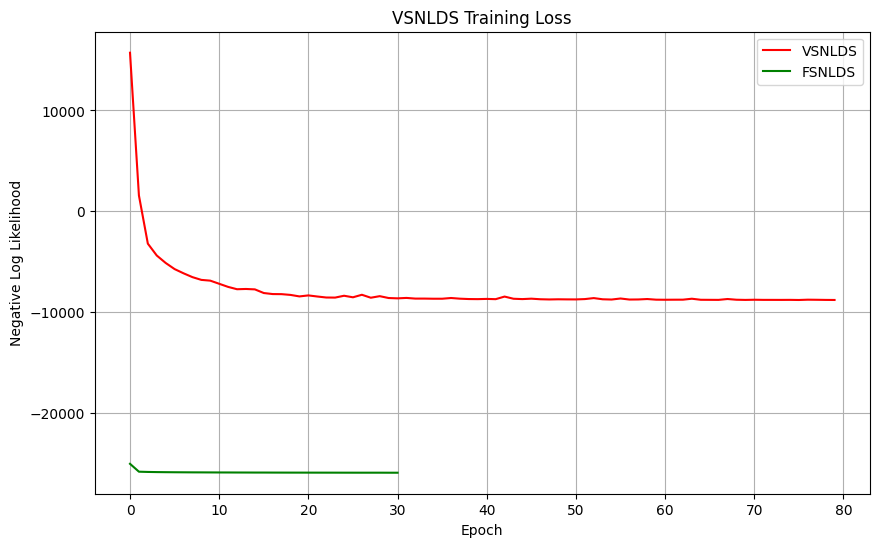

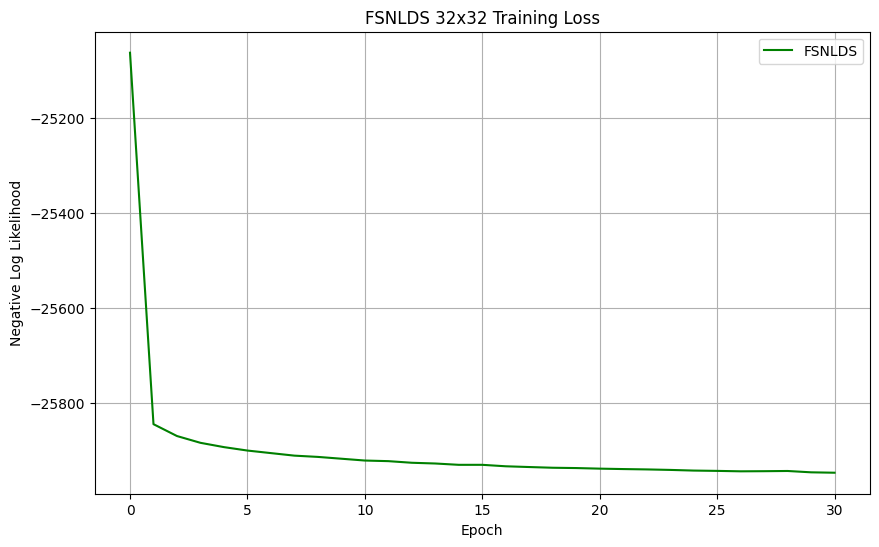

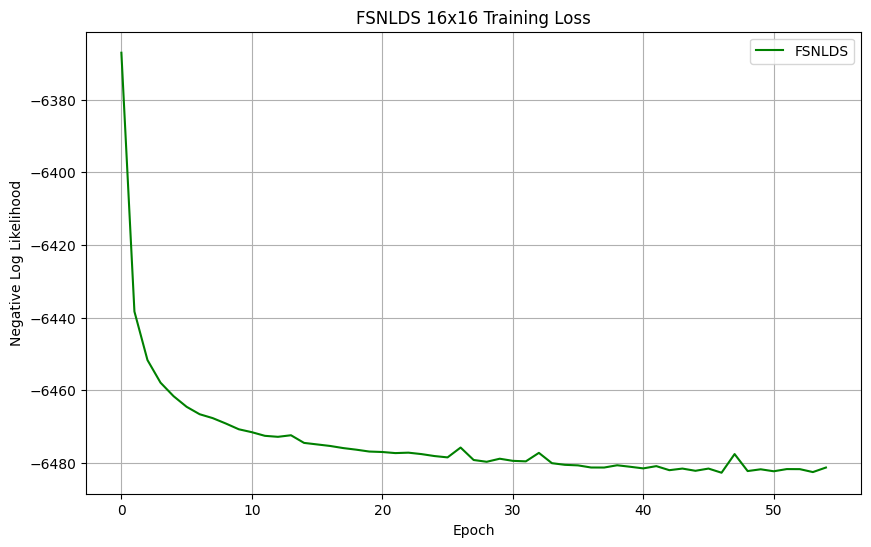

In [19]:
# Check if data is being extracted correctly

# Convert to DataFrame
flow_16_df = extract_data(log_flow_16_path, pattern)
flow_32_df = extract_data(log_flow_32_path, pattern)
vrnn_df = extract_data(log_vrnn_path, pattern2)


# Group by 'Epoch' and compute the mean of each metric for each epoch
flow_16_df = flow_16_df.groupby('Epoch').mean().reset_index()
flow_32_df = flow_32_df.groupby('Epoch').mean().reset_index()
vrnn_df = vrnn_df.groupby('Epoch').mean().reset_index()


# Plotting VSNLDS
plt.figure(figsize=(10, 6))
plt.plot(vrnn_df['Epoch'], (vrnn_df['MSM']-vrnn_df['ELBO'])/100, label='VSNLDS', color='r')
plt.xlabel('Epoch')
plt.ylabel('Negative Log Likelihood')
plt.title('VSNLDS Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting FSNLDS
plt.figure(figsize=(10, 6))
plt.plot(flow_32_df['Epoch'], flow_32_df['Loss']/100, label='FSNLDS', color='g')
plt.xlabel('Epoch')
plt.ylabel('Negative Log Likelihood')
plt.title('FSNLDS 32x32 Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plotting FSNLDS
plt.figure(figsize=(10, 6))
plt.plot(flow_16_df['Epoch'], flow_16_df['Loss']/100, label='FSNLDS', color='g')
plt.xlabel('Epoch')
plt.ylabel('Negative Log Likelihood')
plt.title('FSNLDS 16x16 Training Loss')
plt.legend()
plt.grid(True)
plt.show()